In [14]:
import numpy as np

from HW2.benchmark_proceeder import BenchmarkStorage
from HW2.regression_generator import generate_regression
from HW2.sgd import scaled_mini
from HW2.visualization import visualize_regression_point, visualize_line, draw_levels

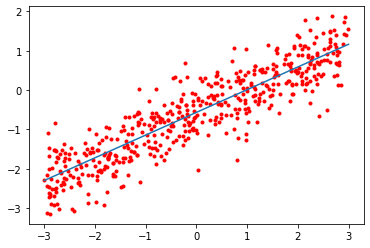

In [15]:
f, points = generate_regression(point_count=500, scale=np.array([3, 0.5]))

visualize_regression_point(f, points, scale=3)

In [16]:
storage = BenchmarkStorage()

# No scale (==1)

[ 0.36105623 -0.36660164]
Benchmark results for config <('mini5-scale1', 1, Default(no) optimization, Squared error calculator)>:
Mean time:0.072989
Mean memory:20.48kB
Mean SMAPE value:0.2397581219721485
Mean RMSE value:0.6695400209042267
Mean logcosh value:0.04812242906897452
Mean gradient calls:2550.0
Iterations done:51.0


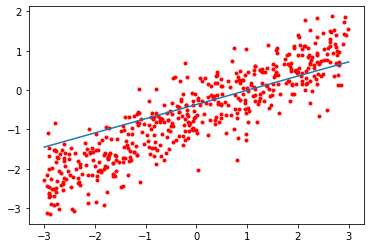

Preparing took 0.0s
Z took 0.312998s
XS and YS took 0.001062s
Drawing levels took 0.122929s
Drawing path took 0.001057s


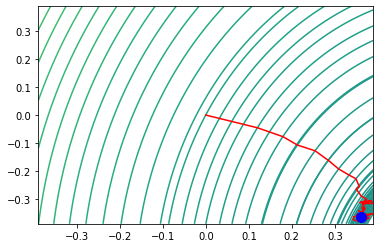

In [17]:
index = storage .add_benchmark_config(batch_size='mini5-scale1')
(ab, meta), ps = scaled_mini(points, batch_size=50, eps=5e-2, scale=1)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, ps)
draw_levels(ps, meta["points"])

# Scale (0.5 $\rightarrow$ 100)

[ 0.99828162 -0.815052  ]
Benchmark results for config <('mini50-scale100', 1, Default(no) optimization, Squared error calculator)>:
Mean time:0.096002
Mean memory:0.0B
Mean SMAPE value:0.016180577666665648
Mean RMSE value:126.20173739460319
Mean logcosh value:0.9058818029149102
Mean gradient calls:3050.0
Iterations done:61.0


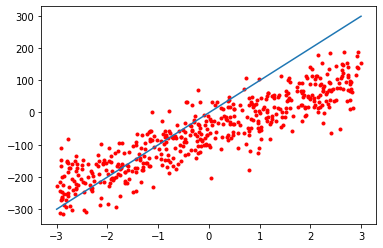

Preparing took 0.0s
Z took 0.317002s
XS and YS took 0.000999s
Drawing levels took 0.073044s
Drawing path took 0.001027s


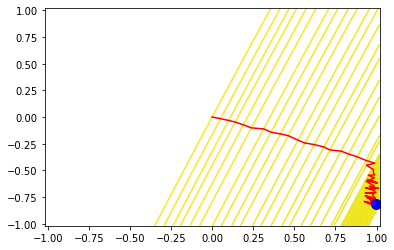

In [18]:
index = storage.add_benchmark_config(batch_size='mini50-scale100')
(ab, meta), ps = scaled_mini(points, batch_size=50, scale=100, eps=1e-1)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(np.array([ab[0] * 100, ab[1]]), ps)
draw_levels(ps, meta["points"])

#### Наблюдения
* Если изначальный разброс маленький, то градиент очень маленький и нам нехватает точности, чтобы прийти в минимум
* Для этого мы уыеличиваем `scale`, чтобы не "перескакивать" минимум
* Чтобы прийти в одну и ту же точку потребуется больше итераций

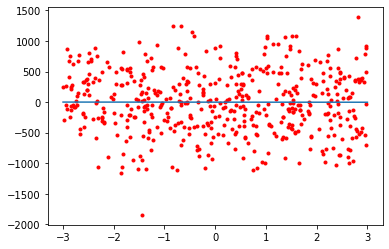

In [19]:
f, points = generate_regression(point_count=500, scale=np.array([3, 500]))

visualize_regression_point(f, points, scale=3)

# Scale (500 $\rightarrow$ 0.01)

[-0.17142793 -0.26266923]
Benchmark results for config <('mini25-scale0.01', 1, Default(no) optimization, Squared error calculator)>:
Mean time:0.167996
Mean memory:0.0B
Mean SMAPE value:0.9476934346923332
Mean RMSE value:5.091167282935887
Mean logcosh value:4.145457866900271
Mean gradient calls:6250.0
Iterations done:125.0


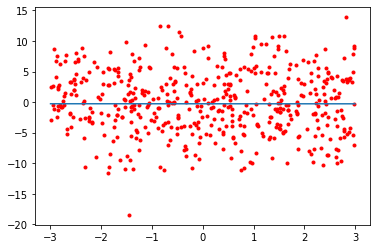

Preparing took 0.0s
Z took 0.375075s
XS and YS took 0.001997s
Drawing levels took 0.103986s
Drawing path took 0.002012s


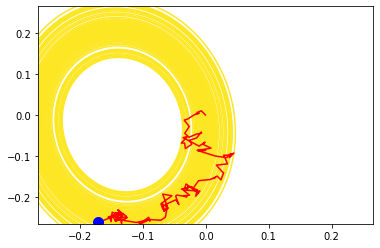

In [20]:
index = storage.add_benchmark_config(batch_size='mini25-scale0.01')
(ab, meta), ps = scaled_mini(points, batch_size=50, eps=2e-2, scale=0.01)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(np.array([ab[0] * 0.01, ab[1]]), ps)
draw_levels(ps, meta["points"])

#### Наблюдения

* Если разброс слишком большой, то для того, чтобы прийти в минимум, нам может не хватить нашего градиента т.к. минимум находится где-то "далеко"
* Для этого мы уменьшаем `scale` и делаем более "широкие" (в изначальном смысле) шаги
* Соответственно, чтобы прийти в одну и ту же точку, потребуется меньше итераций